In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
os.environ['USE_PATH_FOR_GDAL_PYTHON'] = 'YES'
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import georaster
from osgeo import gdal, ogr, osr

os.chdir('C:/Users/jtrum/world_bank/data/')

In [2]:
#import IHME raster
ihme = gdal.Open('sanitation/Percent/IHME_LMIC_WASH_2000_2017_S_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif')

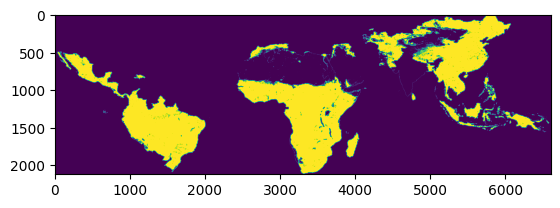

In [3]:
#visualize raster
ihme_array = ihme.ReadAsArray()
plt.imshow(ihme_array)

In [6]:
band = ihme.GetRasterBand(1)

# converting raster to shapefile
proj = raster.GetProjection()
shp_proj = osr.SpatialReference()
shp_proj.ImportFromWkt(proj)

out = 'output/WSF_Luanda.shp'
call_drive = ogr.GetDriverByName('ESRI Shapefile')
create_shp = call_drive.CreateDataSource(out)
shp = create_shp.CreateLayer('layername', srs=shp_proj)
new_field = ogr.FieldDefn(str('ID'), ogr.OFTInteger)
shp.CreateField(new_field)

gdal.Polygonize(band, None, shp, 0, [], callback=None)
create_shp.Destroy()
raster = None

In [7]:
out = 'output/IHME_Luanda.shp'
raster_path = 'sanitation/Percent/IHME_LMIC_WASH_2000_2017_S_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif'
## Check if the output directory exists, and create it if necessary
output_dir = os.path.dirname(out)
if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)

# Open the raster dataset
raster = gdal.Open(raster_path)

if raster is None:
    print("Failed to open the raster dataset.")
else:
    proj = raster.GetProjection()
    shp_proj = osr.SpatialReference()
    shp_proj.ImportFromWkt(proj)

    call_drive = ogr.GetDriverByName('ESRI Shapefile')
    create_shp = call_drive.CreateDataSource(out)

    if create_shp is None:
        print("Failed to create the shapefile.")
    else:
        shp = create_shp.CreateLayer('layername', srs=shp_proj)
        new_field = ogr.FieldDefn('ID', ogr.OFTInteger)
        shp.CreateField(new_field)

        # Assuming 'band' is correctly defined
        gdal.Polygonize(band, None, shp, 0, [], callback=None)

        # Clean up
        create_shp.Destroy()
        raster = None

        print("Shapefile created successfully.")

Shapefile created successfully.


In [8]:
ihme = gpd.read_file('output/IHME_Luanda.shp')

In [9]:
ihme

,ID,geometry
0,86,"POLYGON ((123.16670 53.58333, 123.20836 53.583..."
1,86,"POLYGON ((123.25003 53.58333, 123.37503 53.583..."
2,-999999,"POLYGON ((123.37503 53.58333, 123.45836 53.583..."
3,85,"POLYGON ((122.95836 53.54166, 123.00003 53.541..."
4,85,"POLYGON ((123.04170 53.54166, 123.08336 53.541..."
...,...,...
1235100,75,"POLYGON ((19.95835 -34.79167, 20.00002 -34.791..."
1235101,80,"POLYGON ((20.00002 -34.79167, 20.04168 -34.791..."
1235102,76,"POLYGON ((20.04168 -34.79167, 20.08335 -34.791..."
1235103,77,"POLYGON ((19.95835 -34.83333, 20.04168 -34.833..."


In [13]:
aoi = gpd.read_file('aoiLuanda.geojson')

In [15]:
ihme = ihme.to_crs(aoi.crs)
print(ihme.crs)
print(aoi.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [16]:
join = gpd.sjoin(ihme, aoi, how='inner', predicate='intersects')

In [17]:
len(join)

142

In [22]:
#set max display rows to 142
pd.set_option('display.max_rows', 142)
join

,ID,geometry,index_right,NAME_1,GID_0,COUNTRY,GID_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
946189,65,"POLYGON ((13.37502 -8.62500, 13.41668 -8.62500...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
946190,59,"POLYGON ((13.41668 -8.62500, 13.45835 -8.62500...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
946191,65,"POLYGON ((13.45835 -8.62500, 13.50002 -8.62500...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
946192,58,"POLYGON ((13.50002 -8.62500, 13.54168 -8.62500...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
946193,49,"POLYGON ((13.54168 -8.62500, 13.58335 -8.62500...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
947044,62,"POLYGON ((13.37502 -8.66667, 13.41668 -8.66667...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
947045,41,"POLYGON ((13.41668 -8.66667, 13.45835 -8.66667...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
947046,58,"POLYGON ((13.45835 -8.66667, 13.50002 -8.66667...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
947047,57,"POLYGON ((13.50002 -8.66667, 13.54168 -8.66667...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
947871,59,"POLYGON ((13.37502 -8.70833, 13.41668 -8.70833...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC


In [23]:
# drop last row of data
join = join[:-1]
len(join)

141

In [24]:
join.tail(5)

,ID,geometry,index_right,NAME_1,GID_0,COUNTRY,GID_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
957571,45,"POLYGON ((13.12502 -9.25000, 13.16668 -9.25000...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
957572,44,"POLYGON ((13.20835 -9.25000, 13.25002 -9.25000...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
958107,43,"POLYGON ((13.16668 -9.25000, 13.20835 -9.25000...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
958324,55,"POLYGON ((13.12502 -9.29167, 13.16668 -9.29167...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
958998,57,"POLYGON ((13.12502 -9.33333, 13.16668 -9.33333...",0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC


<Axes: >

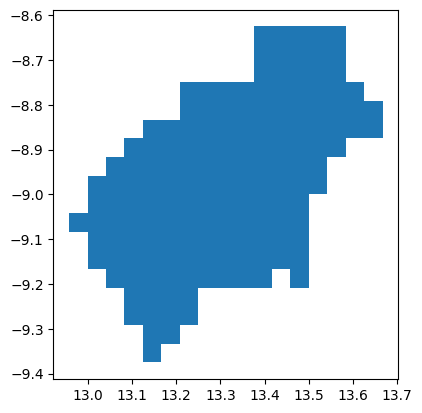

In [25]:
join.plot()

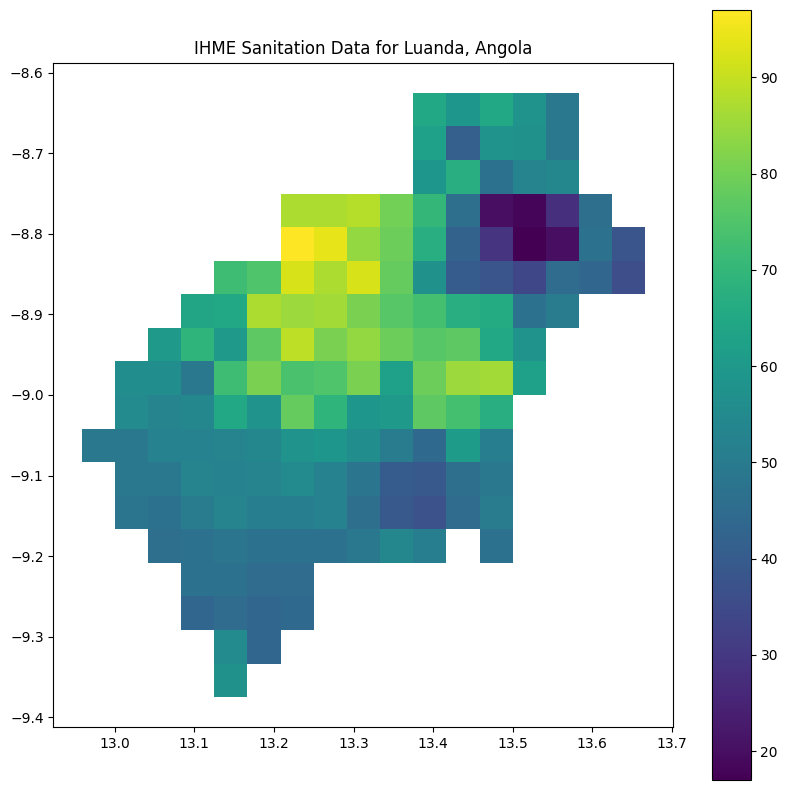

In [26]:
#plot join
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
join.plot(ax=ax, column='ID', legend=True)
plt.title('IHME Sanitation Data for Luanda, Angola')
plt.show()

In [32]:
# make a folium map of the data with a colorbar
m = folium.Map(location=[-8.8383, 13.2344], zoom_start=11)

folium.Choropleth(
    geo_data=join,
    name='choropleth',
    data=join,
    columns=['ID', 'COUNTRY'],
    key_on='feature.properties.ID',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sanitation Data'
).add_to(m)

folium.LayerControl().add_to(m)

m

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''